# POKER GAME ANALYSIS

### Below is an analysis of some aspects of the poker game. The original data was downloaded from the Kaggle platform and then cleaned and transformed into minor datasets by Python.

## PART 1 - Analysis of average odds of winning for each player

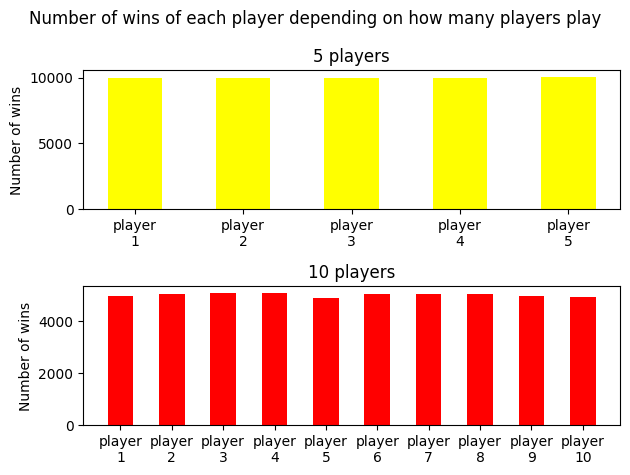

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

for i,x in enumerate([5,10]):
    colors = ['yellow','red']
    plt.subplot(2,1,i+1)
    with open(f"example_results\\{x}_players_players.csv") as data:
        data = pd.DataFrame(pd.read_csv(data))
        players = np.array([f'player\n{n}' for n in range(1,len(data)+1)])
        plt.bar(players,data["Number of wins"], color=colors[i], width=0.5)
        plt.ylabel("Number of wins")
        plt.title(f"{x} players")

plt.suptitle("Number of wins of each player depending on how many players play")
plt.tight_layout()

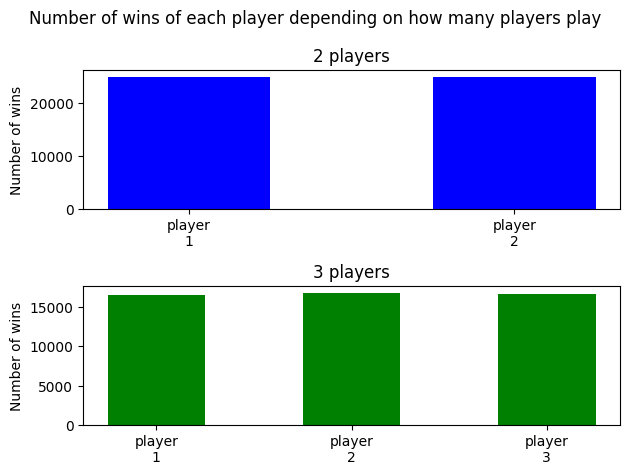

In [127]:
plt.suptitle("Number of wins of each player depending on how many players play")

plt.subplot(2,1,1)

for i,x in enumerate([2,3]):
    colors = ['blue','green']
    plt.subplot(2,1,i+1)
    with open(f"example_results\\{x}_players_players.csv") as data:
        data = pd.DataFrame(pd.read_csv(data))
        players = np.array([f'player\n{n}' for n in range(1,len(data)+1)])
        plt.bar(players,data["Number of wins"], color=colors[i], width=0.5)
        plt.ylabel("Number of wins")
        plt.title(f"{x} players")

plt.suptitle("Number of wins of each player depending on how many players play")
plt.tight_layout()

#### From the charts it is easy to conclude that no matter how many players participate in the game, the chance of winning for everyone is about the same. 

### PART 2 - Analysis of rare poker configurations

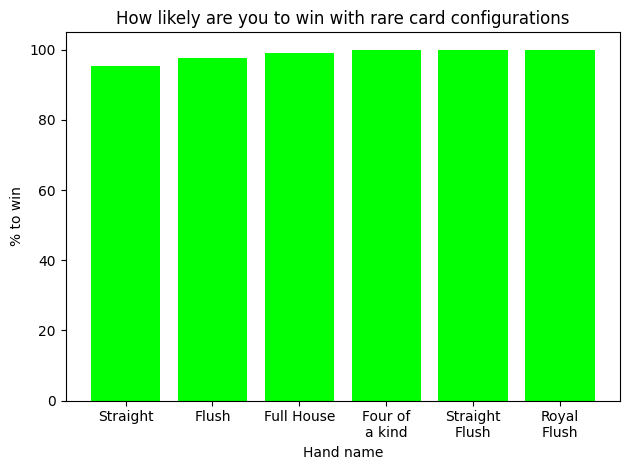

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

with open(f"example_results\\10_players_hands.csv") as data:
    data = pd.DataFrame(pd.read_csv(data))
    data.loc
    data = (data[["Hand Name", "Hand win percent"]]).loc[4:9]
    
    
    xaxis = ["Straight", "Flush", "Full House", "Four of\na kind", "Straight\nFlush", "Royal\nFlush"]
    yaxis = [float(n[0:(len(n)-1)]) for n in data["Hand win percent"]]
    plt.bar(xaxis,yaxis, color = "lime")
    plt.title("How likely are you to win with rare card configurations")
    plt.xlabel("Hand name")
    plt.ylabel("% to win")
    plt.tight_layout()

### Even in the case of doing a simulation with the largest possible number of players in a single poker game, we can see that by having a hand configuratio higher than “Three of a Kind”, the chances of winning with such configuration aren't less than 95 percent. So if you're playing with any number of people and have one of these configurations, it pays to bet high while keeping a poker face so that other players don't see through your tactics.

## PART 3 Analysis of common poker configurations

#### If you have a common poker configuration, the chances of winning a round are more varied and depend on the number of players participating in the game